### 這個工作的目標是在不斷變化的台股市場中尋找穩定獲利的策略。策略名稱取自《易經》，以表徵市場的盤勢發展，並協助投資者趨吉避凶。



In [1]:
import datetime

from dateutil.relativedelta import relativedelta

from stock_tw import util
from stock_tw.變易 import dataset

dataset.datatime_range

{'max_price': Timestamp('2023-11-10 00:00:00'),
 'max_pera': Timestamp('2023-12-31 00:00:00'),
 'max_revenue': Timestamp('2023-11-10 00:00:00'),
 'max_fin_stmt': Timestamp('2023-11-14 00:00:00'),
 'min_price': Timestamp('2023-05-12 00:00:00'),
 'min_pera': Timestamp('2017-12-31 00:00:00'),
 'min_revenue': Timestamp('2017-07-10 00:00:00'),
 'min_fin_stmt': Timestamp('2022-05-15 00:00:00')}

# 不易：元亨


In [2]:
# df = dataset.analyze_base(
#     daily_ts=datetime.datetime(2023, 11, 8),  # ts of the daily price data
#     ifrs_ts=datetime.datetime(2023, 8, 14),  # ts of the financial statement data 
# )
df = dataset.analyze_base(ifrs_ts=datetime.datetime(2023, 8, 14))
df.round(2)

,name,group,收盤價,漲跌幅(%),ts,日均成交張數,日均成交筆數,日均成交金額,本益比,股價淨值比,殖利率(%),股利年度,股利連續N年,普通股股本,資產總計,權益總額,權益比(%)
code,,,,,,,,,,,,,,,,,
1101,台泥,水泥工業,32.85,-0.15,2023-11-10,22742.0,10454.0,795624173.0,26.93,1.12,1.52,111.0,5.0,71561817.0,456341649.0,234719451.0,51.44
1102,亞泥,水泥工業,40.35,-0.12,2023-11-10,4510.0,2529.0,187571971.0,12.04,0.89,5.70,111.0,5.0,35465629.0,335089649.0,184122969.0,54.95
1103,嘉泥,水泥工業,18.30,-0.55,2023-11-10,844.0,485.0,17845221.0,70.38,0.57,2.73,111.0,5.0,7747805.0,37755420.0,23417199.0,62.02
1104,環泥,水泥工業,26.75,0.56,2023-11-10,1770.0,1003.0,50578846.0,9.35,0.80,6.73,111.0,5.0,6536092.0,29120141.0,22306599.0,76.60
1108,幸福,水泥工業,14.30,0.00,2023-11-10,920.0,410.0,14271017.0,8.41,1.20,5.59,111.0,4.0,4047380.0,9725755.0,4812635.0,49.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,英瑞-KY,電機機械,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1566,捷邦,電機機械,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1507,永大,電機機械,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# 不易：利貞

In [3]:
df = dataset.analyze_profit(ifrs_ts=datetime.datetime(2023, 8, 14))
df.iloc[:, 6:28].round(2)

,E(0),E(1),E(2),E(3),外(0),外(1),外(2),外(3),GPM(0),NIM(0),...,DBR(0),created_ts,GPM,NIM,ROA,ROE,DBR,EPS(0)+,GPM+,NIM+
code,,,,,,,,,,,,,,,,,,,,,
1101,0.45,0.20,0.36,0.22,57.38,130.74,56.51,90.06,21.63,15.20,...,48.56,2023-11-07 05:40:45,54.21,31.80,2.06,4.04,49.13,0.25,12.24,11.38
1102,1.26,0.81,0.19,1.33,64.97,62.32,-5.82,68.77,15.86,20.80,...,45.05,2023-11-07 05:40:45,46.47,58.43,3.72,6.71,44.43,0.45,5.55,6.40
1103,0.00,0.03,0.05,0.41,44805.00,315.70,319.48,144.23,10.81,0.01,...,37.98,2023-11-07 05:40:45,39.93,60.03,0.96,1.58,38.76,-0.03,1.19,-3.96
1104,0.62,0.42,0.92,0.87,64.93,43.41,71.18,72.55,19.99,21.99,...,23.40,2023-11-07 05:40:45,78.93,106.22,7.20,9.34,22.80,0.20,1.22,6.71
1108,0.37,0.31,0.69,0.33,-0.99,8.53,-2.09,10.23,20.64,11.47,...,50.52,2023-11-07 05:40:45,93.51,58.60,7.17,14.37,50.31,0.06,2.21,-0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [4]:
df.iloc[:,28:-6].head(5).round(2)

,ROA+,ROE+,DBR+,股本(%)+,資產(%)+,權益(%)+,本期淨利（淨損）,YoYQ,QoQ,IsQ3
code,,,,,,,,,,
1101,0.70,1.37,0.57,0.00,-1.15,-2.23,4206683.0,-547.18,318.31,False
1102,0.48,0.85,-1.01,0.02,0.37,2.26,4396883.0,-7.00,58.90,True
1103,-0.07,-0.11,-0.43,0.00,1.09,1.79,80.0,-100.02,-99.69,False
1104,0.45,0.62,1.86,0.00,3.50,1.05,421949.0,24.25,50.51,False
1108,0.25,0.45,-0.91,0.00,0.29,2.17,151640.0,29.76,19.20,False


# 不易：躍龍在淵

In [5]:
dataset.append_stock_info(dataset.anal_revenue.round(2))

,name,group,updated_ts,當月營收,當月累計營收,去年累計營收,R(1),R(2),R(y),YoY,MoM,IsM3
code,,,,,,,,,,,,
1101,台泥,水泥工業,2023-11-10 07:00:03,9371746.0,90313749.0,90710057.0,8735157.0,9379408.0,11368096.0,-17.56,7.29,False
1102,亞泥,水泥工業,2023-11-10 06:00:02,6706168.0,66945254.0,73697894.0,6691905.0,6469836.0,7601097.0,-11.77,0.21,True
1103,嘉泥,水泥工業,2023-11-10 11:10:02,257343.0,2372574.0,1803252.0,232979.0,238917.0,209429.0,22.88,10.46,False
1104,環泥,水泥工業,2023-11-10 07:00:03,654514.0,6282268.0,5698929.0,618592.0,617197.0,634981.0,3.08,5.81,True
1108,幸福,水泥工業,2023-11-07 07:50:05,451146.0,4141653.0,3347381.0,404171.0,430420.0,401202.0,12.45,11.62,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9951,皇田,電機機械,2023-11-10 11:10:02,492601.0,4234276.0,3843128.0,470793.0,464195.0,432835.0,13.81,4.63,True
9955,佳龍,其他業,2023-11-08 11:20:02,99903.0,964450.0,986620.0,89272.0,82315.0,80630.0,23.90,11.91,True
9958,世紀鋼,鋼鐵工業,2023-11-09 08:50:02,1293984.0,10833128.0,7189209.0,1245560.0,1206343.0,911834.0,41.91,3.89,True


# 不易：風升

In [6]:
dataset.his_profits.round(2)

普通股股本         資產總計         權益總額          created_ts  \
ts         code                                                             
2022-05-15 1101  61252340.0  452838271.0  235757755.0 2023-11-08 13:17:00   
           1102  35455721.0  321741487.0  189339654.0 2023-11-08 13:17:00   
           1103   7747805.0   40820534.0   26503290.0 2023-11-08 13:17:00   
           1104   6536092.0   26623702.0   20752652.0 2023-11-08 13:17:00   
           1108   4047380.0    8100128.0    4455774.0 2023-11-08 13:17:00   
...                     ...          ...          ...                 ...   
2023-11-14 9931   1203693.0    5952208.0    2578759.0 2023-11-09 06:30:01   
           9933   8027626.0  117396005.0   22168075.0 2023-11-07 05:40:49   
           9935   1738389.0    6750175.0    2307754.0 2023-11-09 06:30:01   
           9943   1252200.0    5743497.0    3945298.0 2023-11-08 11:31:58   
           9951    749000.0    5893502.0    3542512.0 2023-11-08 11:31:58   

                 基本每股盈餘合計  營業外收入及支出合計   營業毛利（毛損）  營業毛利（毛損）淨額   本期淨利（淨損）  \
ts         code                                                           
2022-05-15 1101      0.20    964488.0  1996361.0   1996361.0   856506.0   
           1102      0.76    969748.0  2975892.0   2975892.0  2716844.0   
           1103     -0.12     49021.0    15322.0     15322.0   -77250.0   
           1104      0.82    399944.0   292217.0    292217.0   538395.0   
           1108      0.14    -15285.0   141408.0    141408.0    54885.0   
...                   ...         ...        ...         ...        ...   
2023-11-14 9931      0.34     20790.0    39175.0     39175.0    40817.0   
           9933      0.56      4514.0  1453755.0   1453755.0   680409.0   
           9935      0.49     29379.0   275726.0    275726.0    84467.0   
           9943      2.37     99004.0   361439.0    361439.0   201707.0   
           9951      1.52     39611.0   330843.0    330843.0   114032.0   

                     營業收入合計  ...  繼續營業單位淨利（淨損）  停業單位淨利（淨損）   ROA   ROE    DBR  \
ts         code              ...                                                
2022-05-15 1101  22973461.0  ...          0.20         NaN  0.19  0.36  47.94   
           1102  19681118.0  ...          0.76         NaN  0.84  1.43  41.15   
           1103    512577.0  ...         -0.12         NaN -0.19 -0.29  35.07   
           1104   1532253.0  ...          0.82         NaN  2.02  2.59  22.05   
           1108    880911.0  ...          0.14         NaN  0.68  1.23  44.99   
...                     ...  ...           ...         ...   ...   ...    ...   
2023-11-14 9931    272572.0  ...           NaN         NaN  0.69  1.58  56.68   
           9933  27965516.0  ...          0.55         NaN  0.58  3.07  81.12   
           9935   1324182.0  ...           NaN         NaN  1.25  3.66  65.81   
           9943    684420.0  ...          2.37         NaN  3.51  5.11  31.31   
           9951   1319434.0  ...          1.52         NaN  1.93  3.22  39.89   

                   GPM    NIM     (C)營收合計    (C)平均月營收  (C)合計月數  
ts         code                                                 
2022-05-15 1101   8.69   3.73  22945614.0  7648538.00        3  
           1102  15.12  13.80  19681816.0  6560605.33        3  
           1103   2.99 -15.07    512577.0   170859.00        3  
           1104  19.07  35.14   1532253.0   510751.00        3  
           1108  16.05   6.23    880911.0   293637.00        3  
...                ...    ...         ...         ...      ...  
2023-11-14 9931  14.37  14.97    272572.0    90857.33        3  
           9933   5.20   2.43  27966415.0  9322138.33        3  
           9935  20.82   6.38   1324078.0   441359.33        3  
           9943  52.81  29.47    684420.0   228140.00        3  
           9951  25.07   8.64   1319435.0   439811.67        3  

[11072 rows x 23 columns]

<Axes: xlabel='ts'>

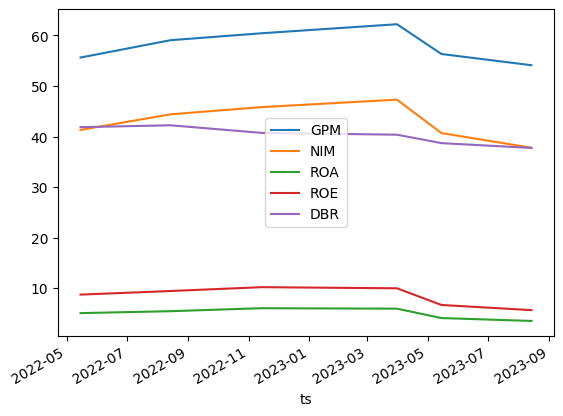

In [8]:
# 台積電獲利能力

df = dataset.his_profits.round(2)
df = dataset.reverse_df_index(df)
df = df.loc['2330'][['GPM', 'NIM', 'ROA' ,'ROE', 'DBR']]
df.plot()

<Axes: >

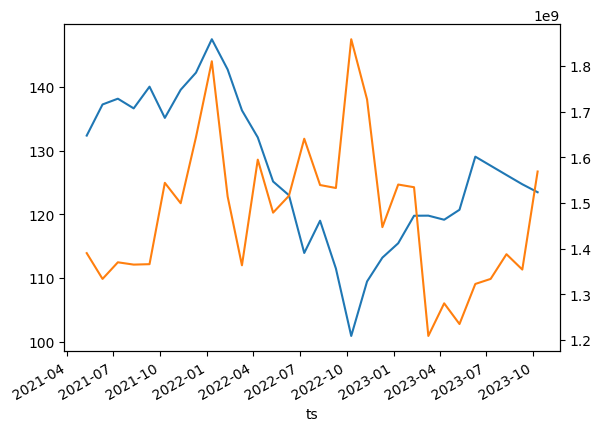

In [9]:
# TW50 股價-營收 趨勢觀察

dataset.refresh_revenues(util.DB_ENGINE, datetime.datetime(2021, 5, 1))
dataset.refresh_prices(util.DB_ENGINE, datetime.datetime(2021, 5, 1))


TW50 = [ '台積電', '鴻海', '聯發科', '台達電', '聯電', '中華電', '中信金', '兆豐金', '玉山金', '南亞', '日月光投控', '中鋼', '台塑', '廣達', 
        '中租-KY', '第一金', '合庫金', '聯詠', '和泰車', '台泥', '台化', '大立光', '華南金', '亞德客-KY', '華新', '台塑化', '彰銀', 
        '矽力*-KY', '陽明', '萬海', '豐泰', '南亞科'] + ["元大金", "台灣大", "國泰金", "富邦金", "統一", "統一超", "遠傳", "遠東新", "開發金"]

_revenues = dataset.revenues.reset_index()
_revenues = _revenues[ (_revenues['ts'] >= datetime.datetime(2021, 5, 10)) & (_revenues['ts'] <= datetime.datetime(2023, 10, 10)) ]
_revenues = dataset.append_stock_info(_revenues).set_index(['name'])
_revenues = _revenues.loc[TW50][['當月營收', 'ts']]
# _revenues.groupby(['ts']).count()
_revenues = _revenues.groupby(['ts']).sum()

_prices = dataset.prices.reset_index()
_prices = _prices[ (_prices['ts'] >= datetime.datetime(2021, 5, 10)) & (_prices['ts'] <= datetime.datetime(2023, 10, 10)) ]
_prices = dataset.append_stock_info(_prices).set_index(['name'])
_prices = _prices.loc['元大台灣50'][['收盤價', 'ts']]
_prices['ts'] = _prices['ts'].apply(lambda x: datetime.datetime(x.year, x.month, 10))
_prices = _prices.groupby(['ts']).mean()

_prices['收盤價'].plot()
_revenues['當月營收'].plot(secondary_y=True)

# 不易：飛龍在天

In [10]:
df = dataset.analyze_profit(ifrs_ts=datetime.datetime(2023, 8, 14))
df.iloc[:, 19:-6].round(2)

,created_ts,GPM,NIM,ROA,ROE,DBR,EPS(0)+,GPM+,NIM+,ROA+,ROE+,DBR+,股本(%)+,資產(%)+,權益(%)+,本期淨利（淨損）,YoYQ,QoQ,IsQ3
code,,,,,,,,,,,,,,,,,,,
1101,2023-11-07 05:40:45,54.21,31.80,2.06,4.04,49.13,0.25,12.24,11.38,0.70,1.37,0.57,0.00,-1.15,-2.23,4206683.0,-547.18,318.31,False
1102,2023-11-07 05:40:45,46.47,58.43,3.72,6.71,44.43,0.45,5.55,6.40,0.48,0.85,-1.01,0.02,0.37,2.26,4396883.0,-7.00,58.90,True
1103,2023-11-07 05:40:45,39.93,60.03,0.96,1.58,38.76,-0.03,1.19,-3.96,-0.07,-0.11,-0.43,0.00,1.09,1.79,80.0,-100.02,-99.69,False
1104,2023-11-07 05:40:45,78.93,106.22,7.20,9.34,22.80,0.20,1.22,6.71,0.45,0.62,1.86,0.00,3.50,1.05,421949.0,24.25,50.51,False
1108,2023-11-07 05:40:45,93.51,58.60,7.17,14.37,50.31,0.06,2.21,-0.17,0.25,0.45,-0.91,0.00,0.29,2.17,151640.0,29.76,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1566,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1507,NaT,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# 不易：亢龍有悔